In [9]:
f = open('BRM-emot-submit.csv')
warriner = dict()
f.readline()
for line in f:
    l = line.rstrip().split(',')
    warriner[l[1]] = (float(l[2]),int(l[0]))
print(len(warriner))
print(warriner['aardvark'])
f.close()

13915
(6.26, 1)


In [10]:
tmpfixedwords = []
tmpfixedscores = []
tmpstemwords = []
tmpstemscores = []

for key,score in warriner.items():
    if key[-1] == '*':
        tmpstemwords.append(key.replace('*',''))
        tmpstemscores.append(score[0])
    else:
        tmpfixedwords.append(key)
        tmpfixedscores.append(score[0])
stemindexer = sorted(range(len(tmpstemscores)), key=lambda k: tmpstemscores[k], reverse=True)
fixedindexer = sorted(range(len(tmpfixedwords)), key=lambda k: warriner[tmpfixedwords[k]][1])
# sort them
stemwords = [tmpstemwords[i] for i in stemindexer]
stemscores = [tmpstemscores[i] for i in stemindexer]
fixedwords = [tmpfixedwords[i] for i in fixedindexer]
fixedscores = [tmpfixedscores[i] for i in fixedindexer]
fixedwords[:10]

['aardvark',
 'abalone',
 'abandon',
 'abandonment',
 'abbey',
 'abdomen',
 'abdominal',
 'abduct',
 'abduction',
 'abide']

In [11]:
f = open('SUBTLEX/SUBTLEXus74286wordstextversion.txt')
SUBTLEX = dict()
f.readline()
for line in f:
    l = line.rstrip().split('\t')
    SUBTLEX[l[0]] = int(l[1])
print(len(SUBTLEX))
print(SUBTLEX['aardvark'])
f.close()

fixedwordCounts = [SUBTLEX[word] if word in SUBTLEX else 1 for word in fixedwords]
print(fixedwordCounts[:10])

74286
21
[21, 26, 413, 49, 1, 171, 174, 36, 185, 138]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
log10fixedWordCounts = np.log10(fixedwordCounts)
print(log10fixedWordCounts[:10])

[ 1.32221929  1.41497335  2.61595005  1.69019608  0.          2.23299611
  2.24054925  1.5563025   2.26717173  2.13987909]


[1.0, 1.2051282051282051]
0
[1.2051282051282051, 1.4102564102564101]
4
[1.4102564102564101, 1.6153846153846154]
15
[1.6153846153846154, 1.8205128205128205]
23
[1.8205128205128205, 2.0256410256410255]
65
[2.0256410256410255, 2.2307692307692308]
95
[2.2307692307692308, 2.4358974358974361]
138
[2.4358974358974361, 2.641025641025641]
234
[2.641025641025641, 2.8461538461538458]
252
[2.8461538461538458, 3.0512820512820511]
340
[3.0512820512820511, 3.2564102564102564]
331
[3.2564102564102564, 3.4615384615384617]
332
[3.4615384615384617, 3.6666666666666665]
396
[3.6666666666666665, 3.8717948717948718]
429
[3.8717948717948718, 4.0769230769230766]
439
[4.0769230769230766, 4.2820512820512819]
454
[4.2820512820512819, 4.4871794871794872]
556
[4.4871794871794872, 4.6923076923076916]
713
[4.6923076923076916, 4.8974358974358978]
794
[4.8974358974358978, 5.1025641025641022]
924
[5.1025641025641022, 5.3076923076923075]
991
[5.3076923076923075, 5.5128205128205128]
1017
[5.5128205128205128, 5.71794871794

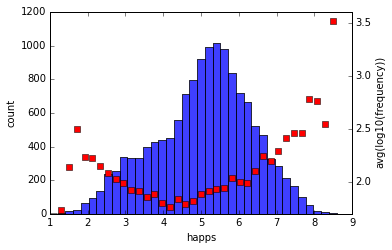

In [14]:
xmin = 1
xmax = 9
step = .2
y1, x1 = np.histogram(fixedscores, bins=np.linspace(xmin, xmax, (xmax-xmin)/step))
# go add up the log10 of the wordcounts for each bin
log10countAvg = np.zeros(y1.size)
j = 0

for i,x in zip(range(len(x1[1:])),x1[1:]):
    n = 0
    print([x1[i],x])
    for j,score in zip(range(len(fixedscores)),fixedscores):
        if score > x1[i] and score <= x:
            n+=1
            log10countAvg[i] += log10fixedWordCounts[j]
    print(n)
    if n>0:
        log10countAvg[i] = log10countAvg[i]/n
print(log10countAvg[1:-2])

fig = plt.figure()
ax1 = fig.add_axes([0.15,0.2,0.7,0.7])
ax1.hist(fixedscores, bins=x1, alpha=0.75)
ax1.set_ylabel('count')
ax1.set_xlabel('happs')
# ax1.plot(x1[:-1]+step/2,y1)


ax2 = ax1.twinx()
ax2.plot(x1[:-1]+step/2,log10countAvg,'rs')
ax2.set_ylim([1.7,3.6])
ax2.set_ylabel('avg(log10(frequency))')

fig.savefig('warriner_fig1.png')
fig.savefig('warriner_fig1.pdf')

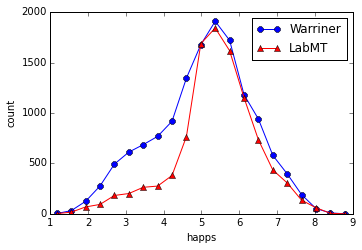

In [25]:
from labMTsimple.speedy import sentiDict
LabMT = sentiDict('LabMT')
LabMT.makeListsFromDict(LabMT.data)

step = 0.35

fig = plt.figure()
ax1 = fig.add_axes([0.15,0.2,0.7,0.7])
ax1.set_ylabel('count')
ax1.set_xlabel('happs')

y1, x1 = np.histogram(fixedscores, bins=np.linspace(xmin, xmax, (xmax-xmin)/step))
ax1.plot(x1[:-1]+step/2,y1,'b-8')

y2, x2 = np.histogram(LabMT.fixedscores, bins=np.linspace(xmin, xmax, (xmax-xmin)/step))
ax1.plot(x2[:-1]+step/2,y2,'r-^')

plt.legend(['Warriner','LabMT'])
plt.savefig('reply-fig1.png')
plt.savefig('reply-fig1.pdf')

In [4]:
import numpy as np
np.median?